# 다중회귀

## Sample 데이터
train X = length, height, width

train Y = weight


In [48]:
import pandas as pd
import numpy as np

# length, heigh, width
pdf = pd.read_csv("http://bit.ly/perch_csv_data") # length, height, width
perch_full = pdf.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

print("*"*70)
print("check data")
print(f"train X = {perch_full[:3]}")
print(f"train Y = {perch_weight[:3]}")


print("\n","*"*70)
print("split train and test data")
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(perch_full, perch_weight, random_state=42)
print("train_X=", train_X.shape, ", train_Y=",train_Y.shape)
print("test_X=", test_X.shape, ", test_Y= ", test_Y.shape)

**********************************************************************
check data
train X = [[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]]
train Y = [ 5.9 32.  40. ]

 **********************************************************************
split train and test data
train_X= (42, 3) , train_Y= (42,)
test_X= (14, 3) , test_Y=  (14,)


## Sklearn's Transformer

### PolynomialFeatures

- 사이킷런에서 **특성을 만들거나 전처리를 하기 위한 다양한 클래스**를 transformer라고 함
- fit(), trainsform() 이 존재
- PolynomialFeatures
  - include_bise(boolean, default=True): 절편의 생성 유무
  - degree(int) : 특성을 제곱으로 생성함 


In [49]:
from sklearn.preprocessing import PolynomialFeatures

# bise를 False로 하면 bise가 제거됨 (만약 include_bise가 True일 경우, bise값이 제일 먼저 나옴)
poly = PolynomialFeatures(include_bias=False) 

# 특성(X)값이 3->9개로 늘어남
poly.fit(train_X)
train_poly_X = poly.transform(train_X)
print("apply polynomiaFeatures")
print(f"train_X {train_X.shape} -- apply poly --> {train_poly_X.shape}")

test_poly_X = poly.transform(test_X)

print("\n", "*"*70)
print(f"check features mean")
print(poly.get_feature_names())


apply polynomiaFeatures
train_X (42, 3) -- apply poly --> (42, 9)

 **********************************************************************
check features mean
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


## 다중 회귀 모델

- 특성이 3개 이상일 경우, 다중 회귀 모델로 문제를 풀어야 함

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly_X, train_Y)
print("check score")
print("train's score: ", lr.score(train_poly_X, train_Y))
print("test's score: ", lr.score(test_poly_X, test_Y))

check score
train's score:  0.9903183436982124
test's score:  0.9714559911594132


In [51]:
poly = PolynomialFeatures(include_bias=False, degree=5) 

# 특성(X)값이 3->55개로 늘어남
poly.fit(train_X)
train_poly_X2 = poly.transform(train_X)
print("apply polynomiaFeatures")
print(f"train_X {train_X.shape} -- apply poly --> {train_poly_X2.shape}")

test_poly_X2 = poly.transform(test_X)

# 특성이 많다고 꼭 좋은것만은 아님을 확인
# train데이터에 너무 과대적합되어 test데이터에 잘못된 예측을 수행
lr2 = LinearRegression()
lr2.fit(train_poly_X2, train_Y)
print("check score")
print("train's score: ", lr2.score(train_poly_X2, train_Y))
print("test's score: ", lr2.score(test_poly_X2, test_Y))


apply polynomiaFeatures
train_X (42, 3) -- apply poly --> (42, 55)
check score
train's score:  0.9999999999991096
test's score:  -144.40579242335605


### 정규화
- sklearn의 StandardScaler에서 정규화 지원

In [52]:
from sklearn.preprocessing import StandardScaler

# train 데이터로 StandardSCaler 모델 훈련
ss = StandardScaler()
ss.fit(train_poly_X)

# 정규화
train_poly_scaled_X = ss.transform(train_poly_X)
test_poly_scaled_X = ss.transform(test_poly_X)

## 다중 회귀 모델
- 릿지(ridge)와 라쏘(lasso) 중 릿지를 조금 더 선호
- 둘 다 계수의 크기를 줄이지만, 라쏘는 아예 0으로 만들 수 있음



### 릿지 회귀
- 계수를 제곱한 값을 기준으로 규제를 적용
- 선형 모델의 계수를 작게 만들어 과대적합을 완화시킴

In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_poly_scaled_X, train_Y)

print("Ridge's Score")
print(f"Train's Score: {ridge.score(train_poly_scaled_X, train_Y)}")
print(f"Test's Score: {ridge.score(test_poly_scaled_X, test_Y)}")

Ridge's Score
Train's Score: 0.9857915060511934
Test's Score: 0.9835057194929057


- ridge에서 계수를 조절할 수 있는 alpha 값을 변동하면서 결과 확인하기

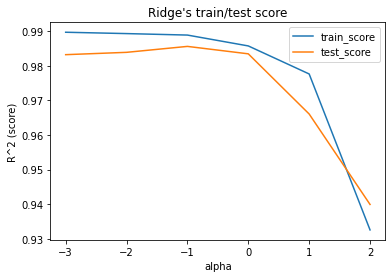

In [54]:
import matplotlib.pyplot as plt
import numpy as np
train_score = []
test_score = []

# 릿지의 alpha값을 통해 규제의 강도를 조절
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_poly_scaled_X, train_Y)

  train_score.append( ridge.score(train_poly_scaled_X, train_Y))
  test_score.append( ridge.score(test_poly_scaled_X, test_Y))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.legend(['train_score', 'test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2 (score)')
plt.title("Ridge's train/test score")
plt.show()

- 최종 ridge 모델 선정

In [55]:
ridge = Ridge(alpha=0.01)
ridge.fit(train_poly_scaled_X, train_Y)

print("Ridge's Score")
print(f"Train's Score: {ridge.score(train_poly_scaled_X, train_Y)}")
print(f"Test's Score: {ridge.score(test_poly_scaled_X, test_Y)}")

Ridge's Score
Train's Score: 0.9893635642716538
Test's Score: 0.9839375394503871


### 라쏘 회귀
- 계수의 절대값을 기준으로 규제를 적용
- 최적의 계수를 찾기 위해 반복적인 계산을 수행

In [56]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_poly_scaled_X, train_Y)


print("Rosso's Score")
print(f"Train's Score: {lasso.score(train_poly_scaled_X, train_Y)}")
print(f"Test's Score: {lasso.score(test_poly_scaled_X, test_Y)}")

Rosso's Score
Train's Score: 0.9865912554645588
Test's Score: 0.9846056618190413


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19687.16876738501, tolerance: 518.2793833333334
  positive)


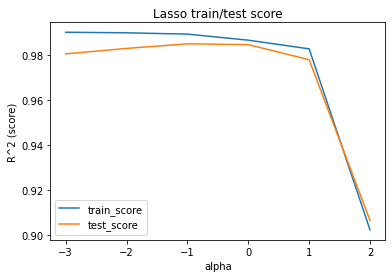

In [57]:
train_score = []
test_score = []

# Lasso의 alpha값을 통해 규제의 강도를 조절
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter=100000)
  lasso.fit(train_poly_scaled_X, train_Y)

  train_score.append( lasso.score(train_poly_scaled_X, train_Y))
  test_score.append( lasso.score(test_poly_scaled_X, test_Y))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.legend(['train_score', 'test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2 (score)')
plt.title("Lasso train/test score")
plt.show()

# warring 중 ConvergenceWarning은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 반복이 부족할 경우 발생
# 이때, max_iter를 높이면 됨

- 최종 Lasso 모델 선정

In [58]:
lasso = Lasso(alpha=1)
lasso.fit(train_poly_scaled_X, train_Y)


print("Rosso's Score")
print(f"Train's Score: {lasso.score(train_poly_scaled_X, train_Y)}")
print(f"Test's Score: {lasso.score(test_poly_scaled_X, test_Y)}")

Rosso's Score
Train's Score: 0.9865912554645588
Test's Score: 0.9846056618190413


In [65]:
# lasso 모델의 계수
print('lasso coef = ', len(lasso.coef_))
print(type(lasso.coef_))
print(lasso.coef_)

# lasso는 계수를 0으로 만들 수 있음
print("count of features equal to 0 = ", np.sum(lasso.coef_ == 0))

lasso coef =  9
<class 'numpy.ndarray'>
[ -0.         -75.17036118  -0.          47.65512744 146.84457339
   9.1970512  157.66441571   0.          62.6831403 ]
count of features equal to 0 =  3
